In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Explore data set and optionaly remove outliers
df = pd.read_csv('./data/falldeteciton.csv')
print(df.head())
print(df.shape)
print(sorted(df['ACTIVITY'].unique()))
print(df.isnull().sum())

#original = len(df)
#features = df.iloc[:,1:]
#cols = list(features.columns)
#for i in cols:
#    IQR = df[i].quantile(0.8) - df[i].quantile(0.2)
#    df = df[(df[i] < (df[i].quantile(0.8) + IQR)) & (df[i] > (df[i].quantile(0.2)-IQR))]
#final = len(df)
#print('Number of outliers removed',original - final)

X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X.head())
print(y.head())
learner_results={}

   ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809
(16382, 7)
[0, 1, 2, 3, 4, 5]
ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64
      TIME        SL      EEG  BP   HR  CIRCLUATION
0  4722.92   4019.64 -1600.00  13   79          317
1  4059.12   2191.03 -1146.08  20   54          165
2  4773.56   2787.99 -1263.38  46   67          224
3  8271.27   9545.98 -2848.93  26  138          554
4  7102.16  14148.80 -2381.15  85  120          809
0    3
1    2
2    2
3    4
4    4
Name: ACTIVITY, dtype: int64


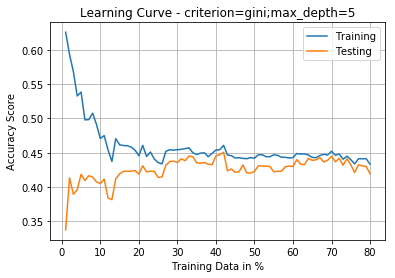

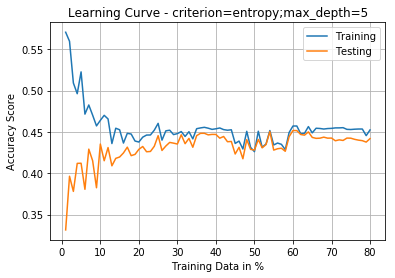

['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']


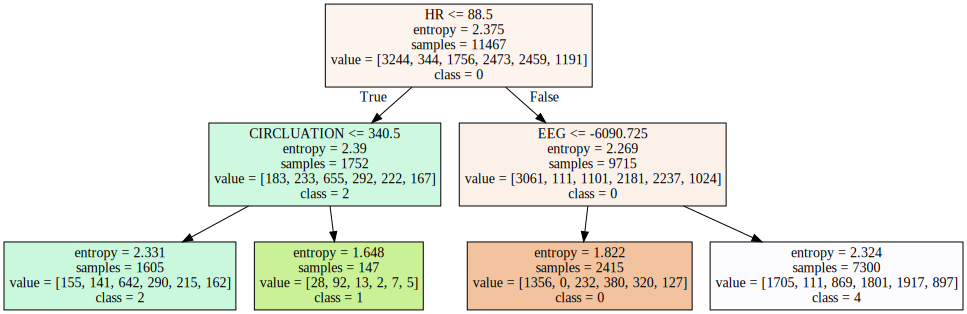

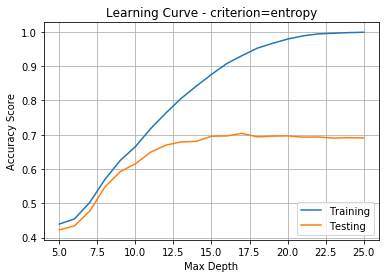

Find best parameters and score:
0.7034550115980954 {'max_depth': 17}


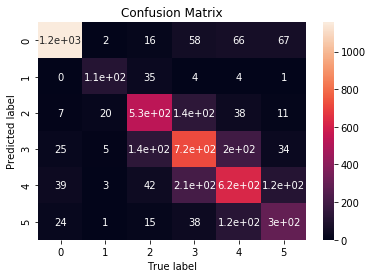

In [2]:
# Decision Tree

# Switch plot backend
plt.switch_backend('Agg')
%matplotlib inline

# Decision Tree Learning
train_list=[]
test_list=[]
for i in range(1,81):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,81),train_list, label='Training')
plt.plot(range(1,81),test_list, label='Testing')
plt.title("Learning Curve - criterion=gini;max_depth=5")
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

train_list=[]
test_list=[]
for i in range(1,81):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,81),train_list, label='Training')
plt.plot(range(1,81),test_list, label='Testing')
plt.title("Learning Curve - criterion=entropy;max_depth=5")
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

# Decision Tree Explore
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
clf = clf.fit(X_train, y_train)
features = list(df.iloc[:,1:].columns.values)
print(features)
graph = Source(export_graphviz(clf,out_file=None,feature_names=features,class_names=['0','1','2','3','4','5'],filled=True))
display(SVG(graph.pipe(format='svg')))

# Decision Tree with different tree depth
train_list=[]
test_list=[]
for i in range(5,26):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(5,26),train_list, label='Training')
plt.plot(range(5,26),test_list, label='Testing')
plt.title("Learning Curve - criterion=entropy")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

# Decision Tree Cross Validation
parameters = {'max_depth':range(5,21)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
clf.fit(X=X, y=y)
#tree_model = clf.best_estimator_
print("Find best parameters and score:")
print(clf.best_score_, clf.best_params_)
learner_results["Decision Tree"] = clf.best_score_

# Decision Tree Confusion Matrix
clf = DecisionTreeClassifier(criterion='entropy', max_depth=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [5]:
# Neural Network

# Neural Network Cross Validation to find best parameters
# When use 'identity' activation function, not able to converge after 200 iterations
clf = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
parameters = {'activation':['relu','logistic'],'hidden_layer_sizes':[(50,),(100,),(150,)],'learning_rate_init':[0.01,0.1]}
clf = GridSearchCV(MLPClassifier(), parameters, cv=3)
clf.fit(X=X_train, y=y_train)
print("Find best parameters and score:")
print(clf.best_score_, clf.best_params_)
learner_results["Neural Network"] = clf.best_score_

Find best parameters and score:
0.3349866463181992 {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}


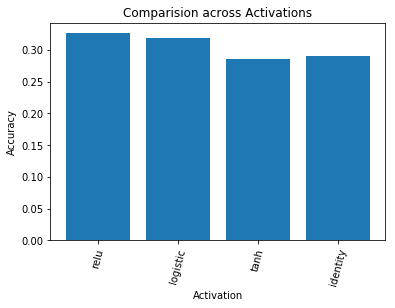

0.4479707049130302


<Figure size 432x288 with 0 Axes>

In [6]:
test_list={}
for i in ['relu','logistic','tanh','identity']:
    clf = MLPClassifier(activation=i, hidden_layer_sizes=(50,), learning_rate_init=0.01)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    test_list[i] = accuracy_score(y_test, test_predict)

plt.bar(test_list.keys(),test_list.values())
plt.xticks(rotation=75)
plt.ylabel('Accuracy')
plt.xlabel('Activation')
plt.title('Comparision across Activations')
plt.show()
plt.clf() 

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(50,), learning_rate_init=0.01)
clf = clf.fit(X_train_scaled, y_train)
test_predict = clf.predict(X_test_scaled)
scale_score = accuracy_score(y_test, test_predict)
print(scale_score)
if scale_score > learner_results["Neural Network"]:
    learner_results["Neural Network"] = scale_score

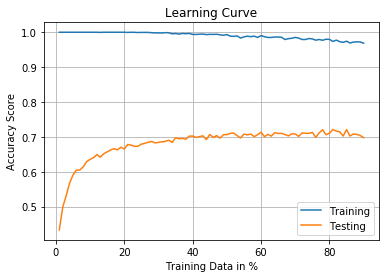

<Figure size 432x288 with 0 Axes>

In [5]:
# Boosting

train_list=[]
test_list=[]
for i in range(1,81):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=50)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,81),train_list, label='Training')
plt.plot(range(1,81),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

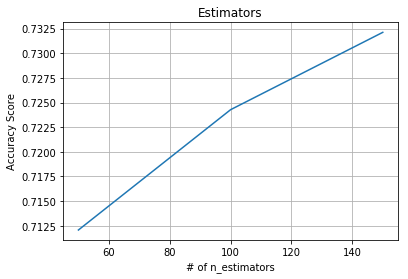

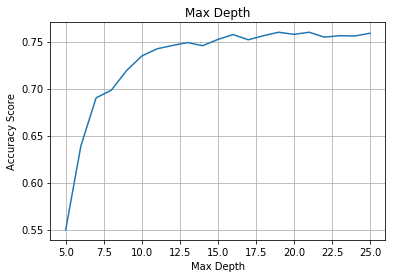

<Figure size 432x288 with 0 Axes>

In [24]:
test_list=[]
for i in [50,100,150]:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot([50,100,150],test_list, label='Testing')
plt.title("Estimators")
plt.grid()
plt.xlabel('# of n_estimators')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

test_list=[]
for i in range(5,26):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i),n_estimators=150)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.35)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(5,26),test_list, label='Testing')
plt.title("Max Depth")
plt.grid()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 
learner_results["Boosting"] = max(test_list)

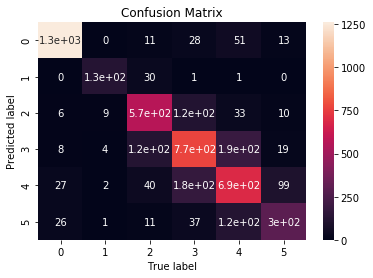

In [25]:
# Boosting Confusion Matrix
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=17),n_estimators=150)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

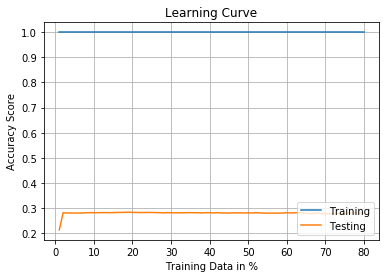

<Figure size 432x288 with 0 Axes>

In [13]:
# SVM

train_list=[]
test_list=[]
for i in range(1,81):
    clf = SVC(gamma='auto')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,81),train_list, label='Training')
plt.plot(range(1,81),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
clf = SVC(gamma='auto')
clf = clf.fit(X_train_scaled, y_train)
test_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_test, test_predict))
learner_results["SVM"] = accuracy_score(y_test, test_predict)

0.41180061037639876


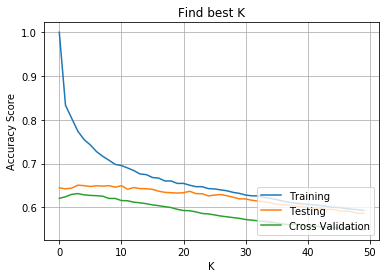

The best K is:
4


<Figure size 432x288 with 0 Axes>

In [9]:
# KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
test_list=[]
train_list=[]
cross_score=[]
for K in range(1,51):
    clf = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
    cross_score.append(sum(scores)/len(scores))
plt.plot(range(len(train_list)),train_list, label='Training')
plt.plot(range(len(test_list)),test_list, label='Testing')
plt.plot(range(len(cross_score)),cross_score, label='Cross Validation')
plt.title("Find best K")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

print("The best K is:")
print(test_list.index(max(test_list)) + 1)

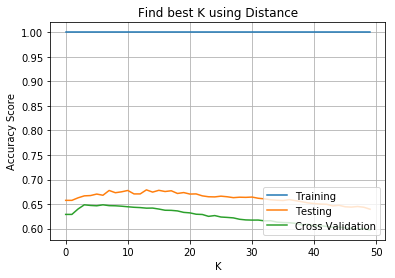

The best K is:
14


<Figure size 432x288 with 0 Axes>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)
test_list=[]
train_list=[]
cross_score=[]
for K in range(1,51):
    clf = KNeighborsClassifier(n_neighbors=K, weights='distance')
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
    cross_score.append(sum(scores)/len(scores))
plt.plot(range(len(train_list)),train_list, label='Training')
plt.plot(range(len(test_list)),test_list, label='Testing')
plt.plot(range(len(cross_score)),cross_score, label='Cross Validation')
plt.title("Find best K using Distance")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

print("The best K is:")
print(test_list.index(max(test_list)) + 1)

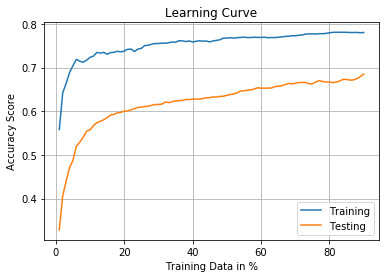

<Figure size 432x288 with 0 Axes>

In [27]:
train_list=[]
test_list=[]
for i in range(1,91):
    clf = KNeighborsClassifier(n_neighbors=4)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    train_list.append(accuracy_score(y_train, train_predict))
    test_list.append(accuracy_score(y_test, test_predict))
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 
learner_results["KNN"] = max(test_list)

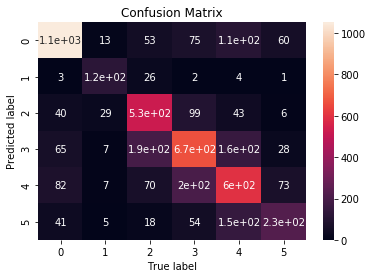

In [28]:
# KNN Confusion Matrix
clf = KNeighborsClassifier(n_neighbors=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,test_predict)
cm = np.round(cm,1)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

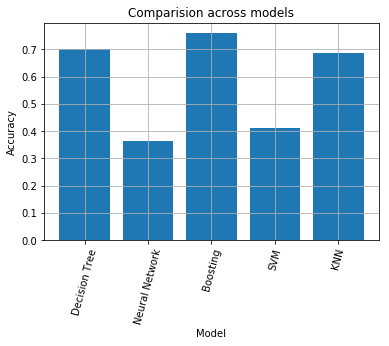

{'Decision Tree': 0.7019899890123306, 'Neural Network': 0.363220144982831, 'Boosting': 0.7598535054063481, 'SVM': 0.41180061037639876, 'KNN': 0.6851738865161684}


In [30]:
plt.bar(learner_results.keys(),learner_results.values())
plt.xticks(rotation=75)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid()
plt.title('Comparision across models')
plt.show()
print(learner_results)